<a href="https://colab.research.google.com/github/Naziaftrn/data_naz/blob/main/tugaskelompokPCD_bodyrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Mount Google Drive: Hubungkan Google Drive ke Google Colab untuk mengakses data.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**2. Akses Folder: Setelah Google Drive ter-mount, Anda bisa mengakses folder collectdata/images dan collectdata/labels seperti direktori biasa di Colab.**

In [2]:

images_path = '/content/drive/MyDrive/collectdata/images'
labels_path = '/content/drive/MyDrive/collectdata/labels'


**3. Menghasilkan gambar setiap tahap**

Directory '/content/drive/MyDrive/collectdata/images' already exists.


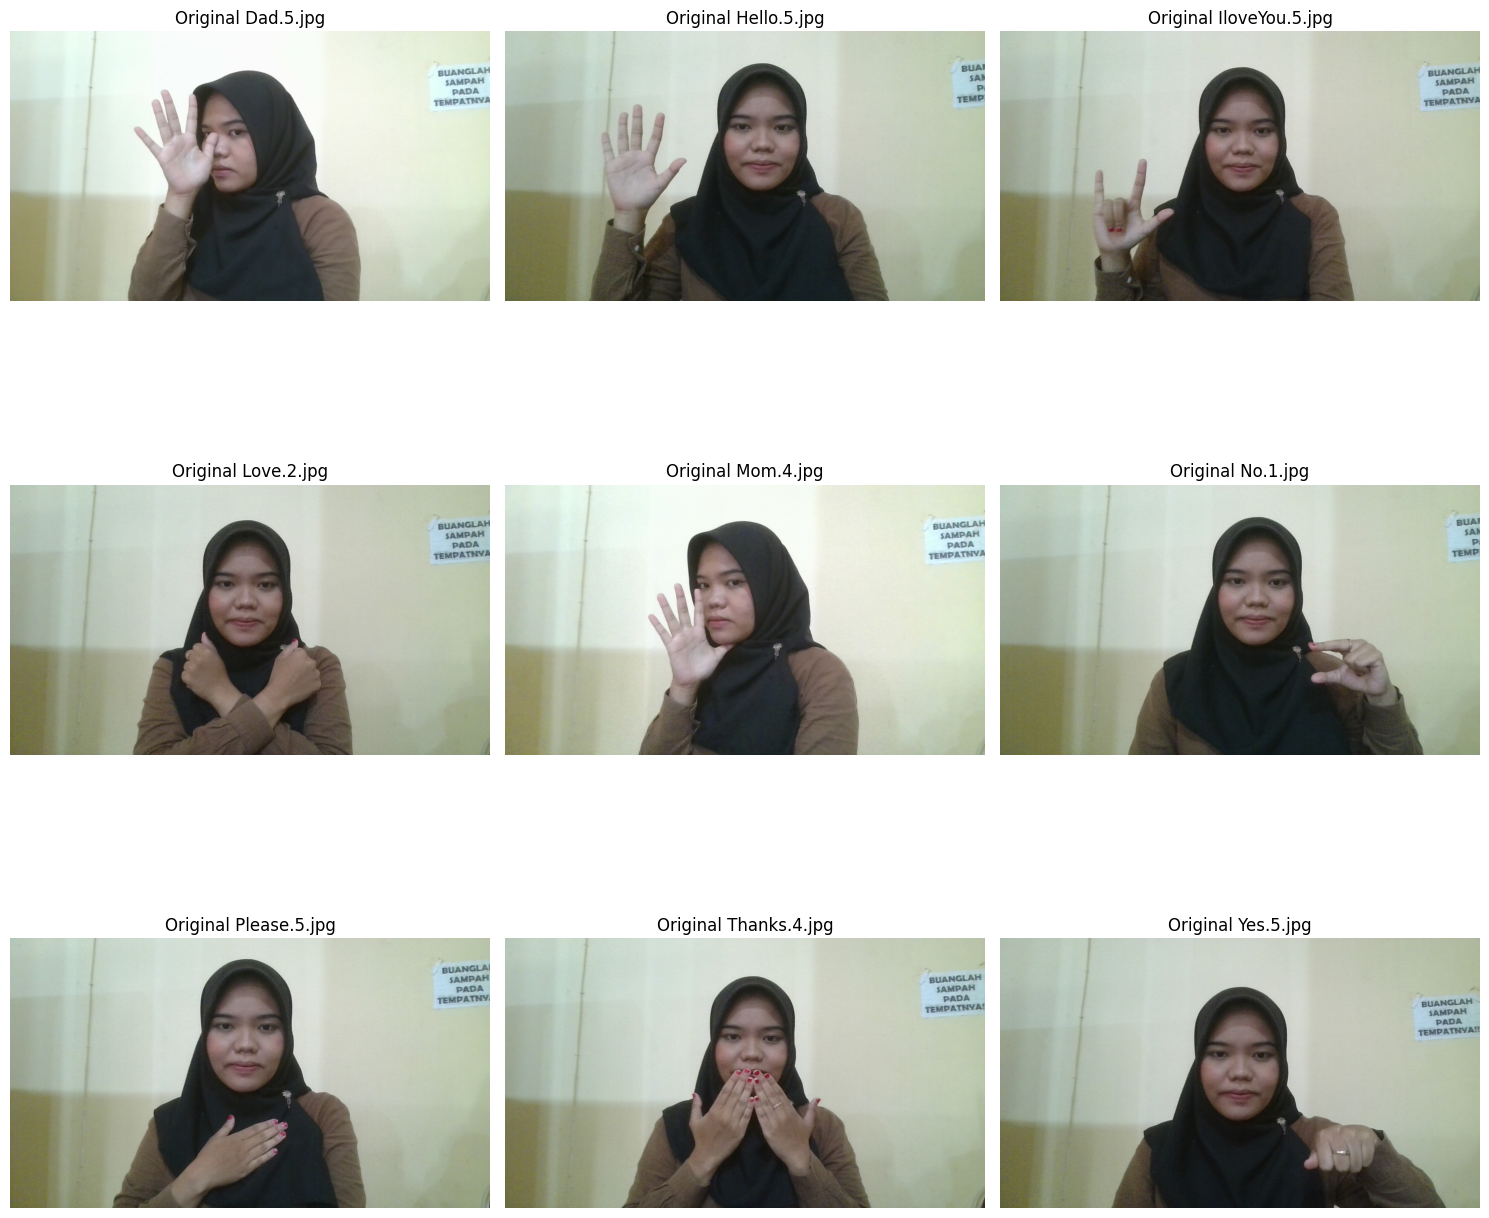

In [5]:
import cv2
from matplotlib import pyplot as plt
import os

# Menampilkan seluruh gambar original
images_path = '/content/drive/MyDrive/collectdata/images'  # Pastikan ini path yang benar
labels_path = '/content/drive/MyDrive/collectdata/labels'  # Pastikan ini path yang benar

# Menambahkan '%matplotlib inline' agar output terlihat di notebook
%matplotlib inline

# Cek apakah direktori ada, dan buat jika tidak
if not os.path.exists(images_path):
    os.makedirs(images_path)
    print(f"Directory '{images_path}' created.")
else:
    print(f"Directory '{images_path}' already exists.")

# Ambil file gambar yang sesuai dengan ekstensi .jpg atau .png
image_files = sorted([f for f in os.listdir(images_path) if f.endswith('.jpg') or f.endswith('.png')])

# Tentukan ukuran plot secara dinamis
plt.figure(figsize=(15, 15))

for idx, image_file in enumerate(image_files):
    if idx >= 9:  # Hanya menampilkan hingga 9 gambar, menyesuaikan ukuran subplot (3x3)
        break
    img = cv2.imread(os.path.join(images_path, image_file))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 3, idx + 1)
    plt.imshow(img_rgb)
    plt.title(f"Original {image_file}")
    plt.axis('off')

plt.tight_layout()
plt.show()


**4. Normalisasi**

Normalisasi adalah teknik yang digunakan untuk merubah nilai piksel gambar agar berada dalam rentang tertentu, biasanya antara 0 dan 1. Hal ini dilakukan agar gambar memiliki pencahayaan dan kontras yang konsisten, yang dapat membantu model AI atau algoritma pengolahan citra dalam mengenali pola lebih baik. Pada gambar gesture tangan dalam bahasa isyarat, normalisasi membantu:

1. Mengurangi Variasi Pencahayaan: Dengan normalisasi, variasi pencahayaan dari satu gambar ke gambar lain bisa dikurangi sehingga pola gesture lebih mudah dikenali.
2. Meningkatkan Konvergensi Model: Dalam proses pelatihan, model akan lebih cepat memahami pola pada gambar yang dinormalisasi.
3. Menstabilkan Nilai Piksel: Normalisasi menghasilkan nilai piksel yang seragam, yang memudahkan algoritma dalam ekstraksi fitur dan pengenalan pola.

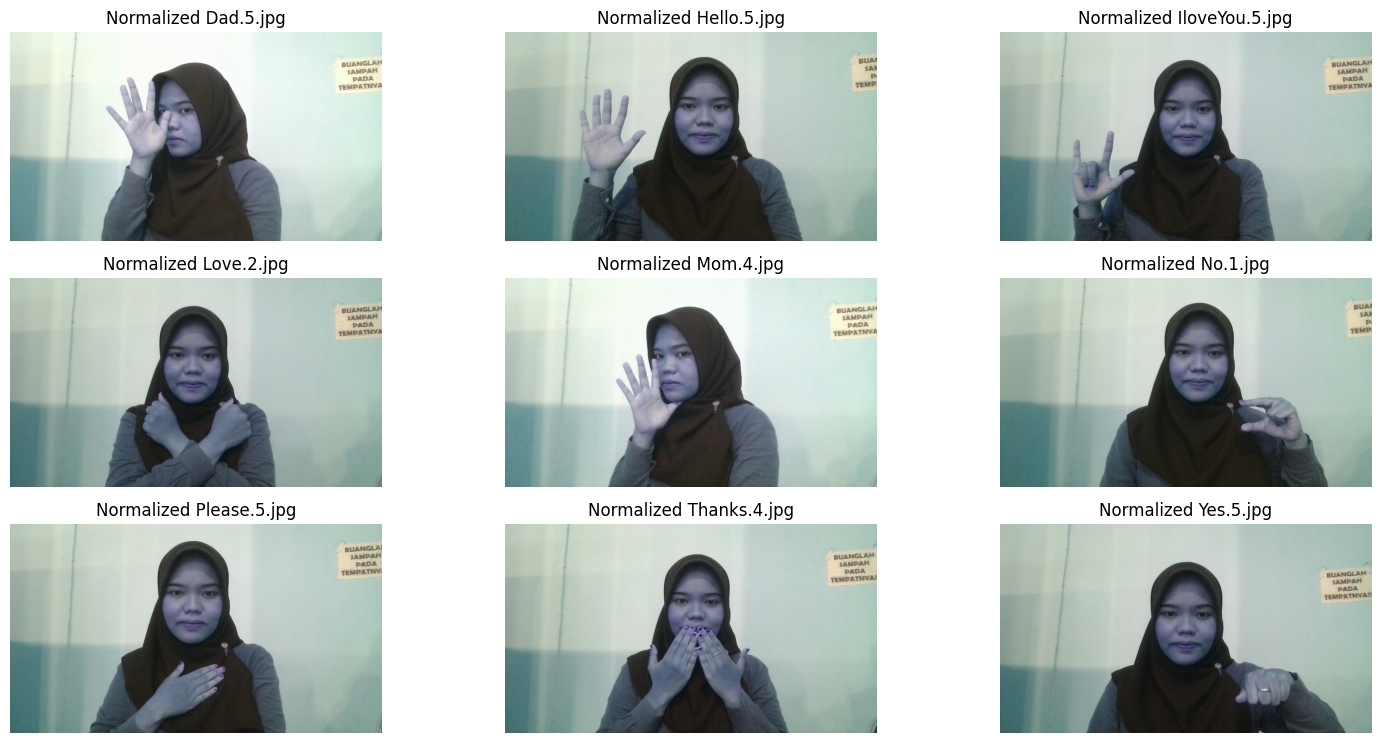

In [6]:
# Mendapatkan daftar file gambar dalam folder images
image_files = sorted([f for f in os.listdir(images_path) if f.endswith('.jpg') or f.endswith('.png')])


# Menampilkan hasil normalisasi tanpa library tambahan
plt.figure(figsize=(15, 10))

for idx, image_file in enumerate(image_files):
    # Membaca gambar
    img = cv2.imread(f"{images_path}/{image_file}")

    # Normalisasi manual: setiap nilai piksel dibagi 255
    normalized_img = img / 255.0  # Nilai piksel sekarang berada dalam rentang 0-1

    # Menampilkan gambar hasil normalisasi
    plt.subplot(len(image_files) // 3 + 1, 3, idx + 1)
    plt.imshow(normalized_img)
    plt.title(f"Normalized {image_file}")
    plt.axis('off')

plt.tight_layout()
plt.show()


**5. segmentasi**

Segmentasi adalah proses penting dalam pengenalan gesture tangan karena:

1. Menyederhanakan gambar dengan menghilangkan informasi yang tidak relevan.
2. Memfokuskan perhatian pada gesture tangan, memungkinkan model lebih akurat dalam mengenali dan mengklasifikasikan gesture.
3. Meningkatkan efisiensi dalam pemrosesan gambar.

Loading image from: /content/drive/MyDrive/collectdata/images/Dad.5.jpg
Loading image from: /content/drive/MyDrive/collectdata/images/Hello.5.jpg
Loading image from: /content/drive/MyDrive/collectdata/images/IloveYou.5.jpg
Loading image from: /content/drive/MyDrive/collectdata/images/Love.2.jpg
Loading image from: /content/drive/MyDrive/collectdata/images/Mom.4.jpg
Loading image from: /content/drive/MyDrive/collectdata/images/No.1.jpg
Loading image from: /content/drive/MyDrive/collectdata/images/Please.5.jpg
Loading image from: /content/drive/MyDrive/collectdata/images/Thanks.4.jpg
Loading image from: /content/drive/MyDrive/collectdata/images/Yes.5.jpg


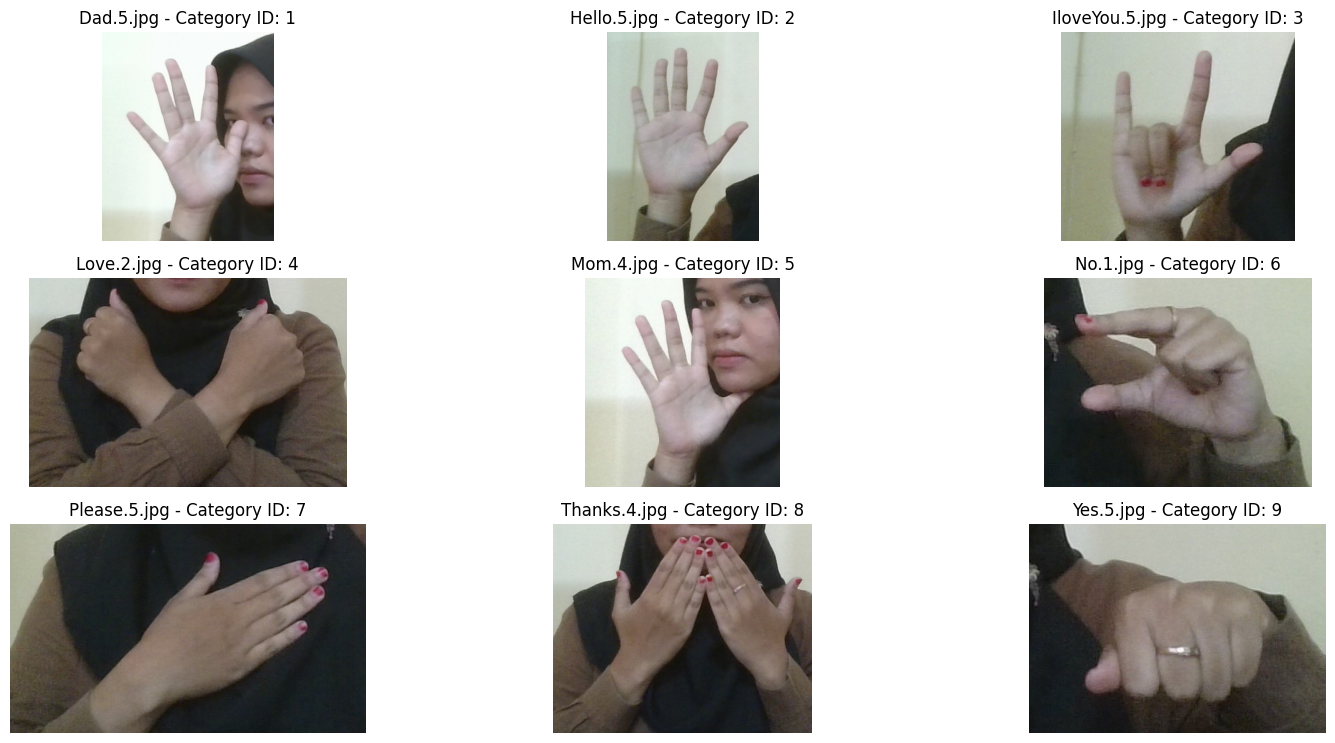

In [7]:
import cv2
from matplotlib import pyplot as plt
import json
import os

# Path ke file JSON dan folder gambar
annotations_path = '/content/drive/MyDrive/collectdata/labels/annotations.json'
images_folder = '/content/drive/MyDrive/collectdata/images'

# Memuat data COCO JSON
with open(annotations_path, 'r') as f:
    annotations_data = json.load(f)

# Menampilkan hasil segmentasi untuk setiap gambar di JSON
plt.figure(figsize=(15, 10))

# Looping melalui setiap anotasi
num_columns = 3  # Menampilkan 3 kolom per baris
num_images = len(annotations_data['annotations'])
for idx, annotation in enumerate(annotations_data['annotations']):
    # Mengambil informasi gambar yang cocok dengan `image_id`
    image_info = next(img for img in annotations_data['images'] if img['id'] == annotation['image_id'])
    image_path = os.path.join(images_folder, image_info['file_name'])

    # Memeriksa apakah path gambar benar
    print(f"Loading image from: {image_path}")

    # Membaca gambar dari file
    img = cv2.imread(image_path)
    if img is None:
        print(f"Gambar tidak ditemukan atau tidak bisa dimuat: {image_path}")
        continue  # Lewati iterasi ini jika gambar tidak ditemukan atau gagal dimuat

    # Mendapatkan bounding box dari anotasi
    x, y, w, h = map(int, annotation['bbox'])
    segmented_img = img[y:y+h, x:x+w]

    # Menampilkan gambar yang telah disegmentasi
    plt.subplot((num_images // num_columns) + 1, num_columns, idx + 1)
    plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
    plt.title(f"{image_info['file_name']} - Category ID: {annotation['category_id']}")
    plt.axis('off')

plt.tight_layout()
plt.show()


**6. EKSTRAKSI FITUR**

1. Ekstraksi Fitur dengan Histogram of Oriented Gradients (HOG)
Kode di bawah ini menggunakan HOG untuk mengekstrak fitur orientasi dari gambar yang telah disegmentasi.

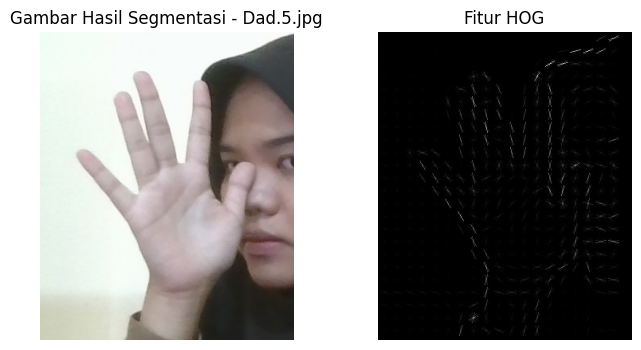

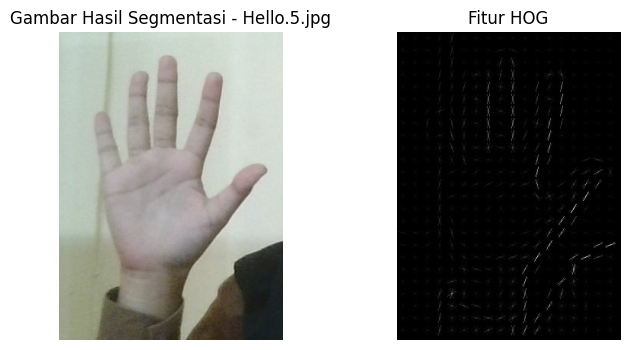

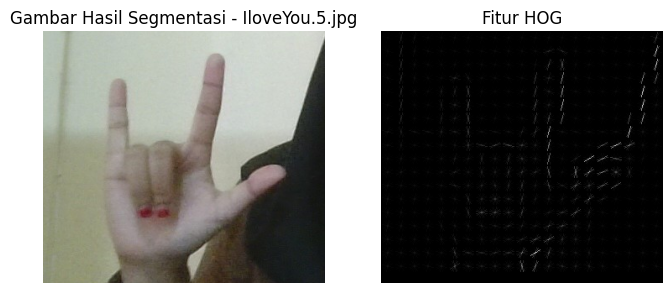

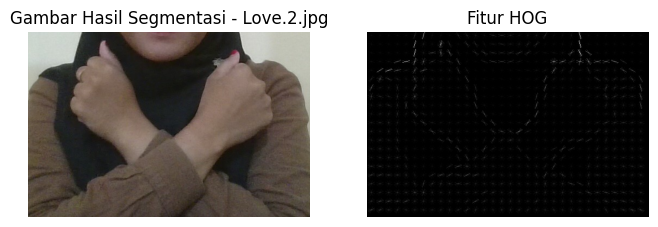

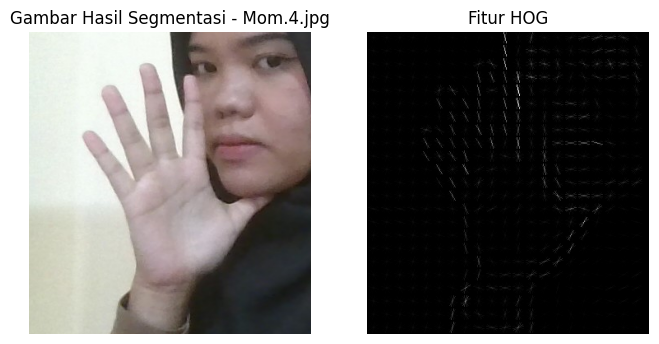

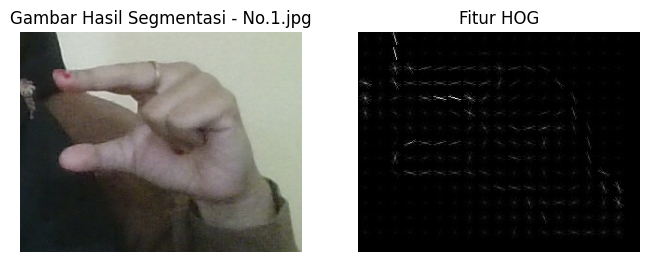

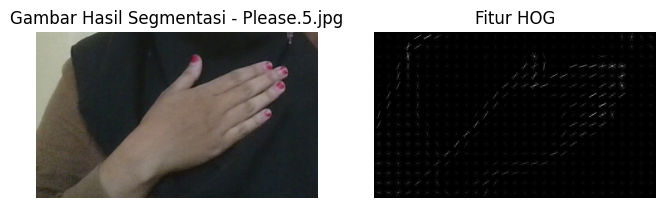

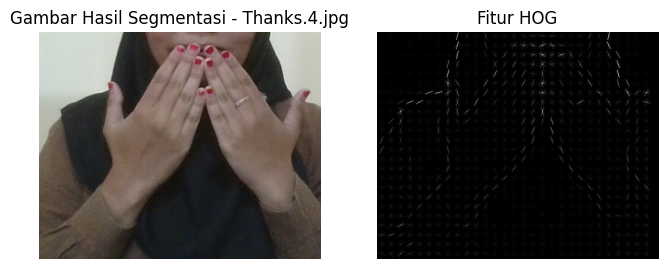

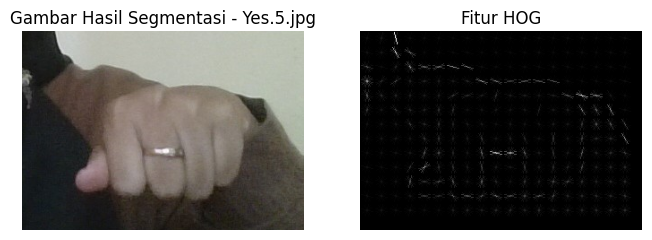

In [8]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
import os

# Path ke folder gambar
images_folder = '/content/drive/MyDrive/collectdata/images'

# Looping melalui setiap anotasi di JSON
for annotation in annotations_data['annotations']:
    # Mendapatkan informasi gambar berdasarkan `image_id`
    image_info = next(img for img in annotations_data['images'] if img['id'] == annotation['image_id'])
    image_path = os.path.join(images_folder, image_info['file_name'])

    # Membaca gambar dari Google Drive
    img = cv2.imread(image_path)
    if img is None:
        print(f"Gambar tidak ditemukan: {image_path}")
        continue

    # Mendapatkan bounding box dari JSON dan melakukan segmentasi
    x, y, w, h = map(int, annotation['bbox'])
    segmented_img = img[y:y+h, x:x+w]

    # Ekstraksi fitur HOG dari gambar hasil segmentasi
    fd, hog_image = hog(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2GRAY), orientations=8,
                        pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)

    # Menampilkan hasil gambar asli dan HOG untuk setiap gambar
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Gambar Hasil Segmentasi - {image_info['file_name']}")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title('Fitur HOG')
    plt.axis('off')
    plt.show()


2. Ekstraksi Fitur dengan Deteksi Keypoints (Menggunakan MediaPipe)
Berikut ini contoh kode untuk mendeteksi keypoints pada tangan menggunakan MediaPipe. MediaPipe otomatis mendeteksi koordinat sendi-sendi tangan yang bisa digunakan sebagai fitur.

Fungsi utama dari kode ini adalah menyederhanakan dan memfokuskan data gambar gesture hanya pada bagian tangan, lalu mendapatkan fitur spesifik (keypoints) yang mewakili posisi jari dan tangan. Hal ini sangat membantu dalam membedakan dan mengenali gesture bahasa isyarat yang berbeda.

In [9]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 40.1 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


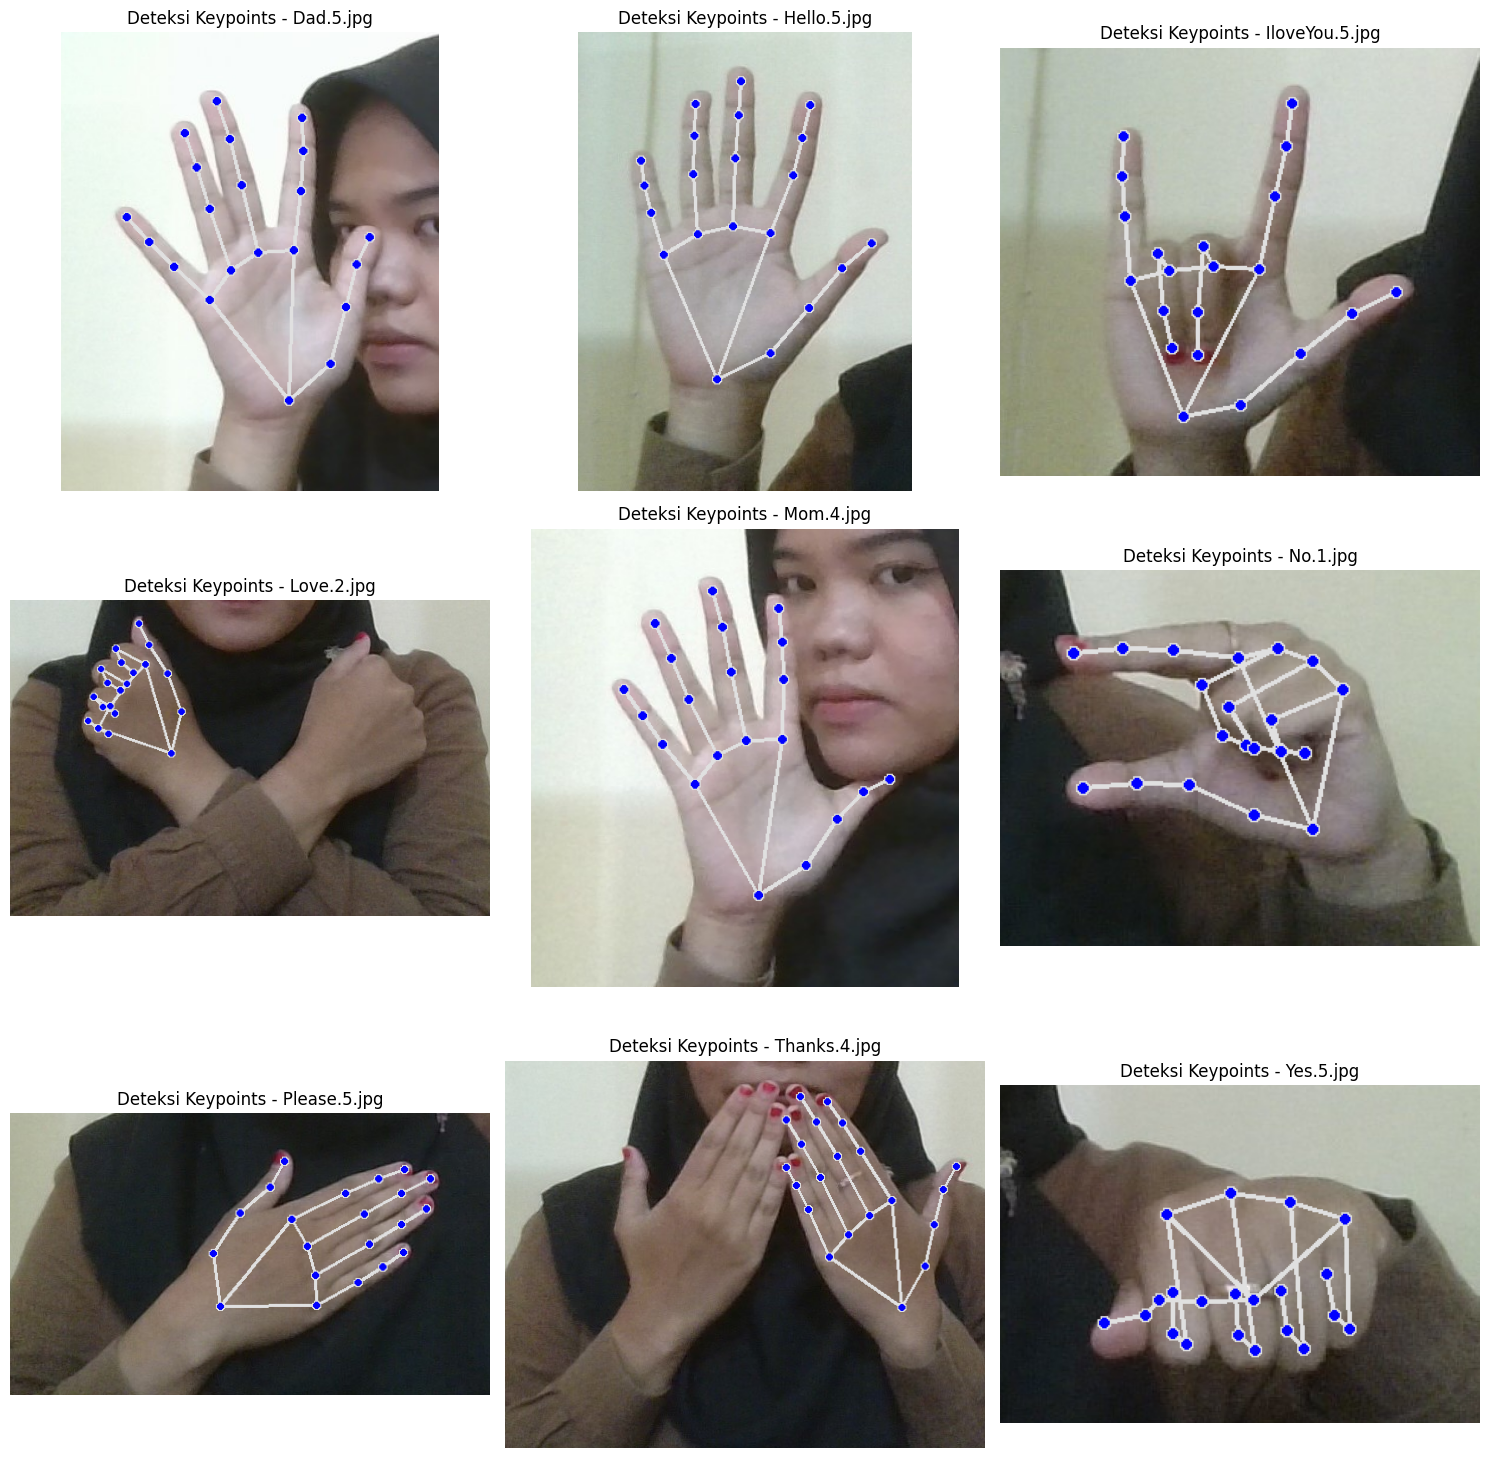

In [10]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import json
import os

# Hubungkan Google Drive jika belum terhubung
from google.colab import drive
drive.mount('/content/drive')

# Path ke file JSON dan folder gambar
annotations_path = '/content/drive/MyDrive/collectdata/labels/annotations.json'
images_folder = '/content/drive/MyDrive/collectdata/images'

# Memuat data COCO JSON
with open(annotations_path, 'r') as f:
    annotations_data = json.load(f)

# Inisialisasi MediaPipe untuk deteksi tangan
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Pengaturan tampilan grid
num_columns = 3  # Menampilkan 3 kolom per baris
num_images = len(annotations_data['annotations'])
plt.figure(figsize=(15, 5 * (num_images // num_columns + 1)))

# Looping melalui setiap anotasi di JSON
for idx, annotation in enumerate(annotations_data['annotations']):
    # Mendapatkan informasi gambar berdasarkan `image_id`
    image_info = next(img for img in annotations_data['images'] if img['id'] == annotation['image_id'])
    image_path = os.path.join(images_folder, image_info['file_name'])

    # Membaca gambar dari Google Drive
    img = cv2.imread(image_path)
    if img is None:
        print(f"Gambar tidak ditemukan: {image_path}")
        continue

    # Mendapatkan bounding box dari JSON dan melakukan segmentasi
    x, y, w, h = map(int, annotation['bbox'])
    segmented_img = img[y:y+h, x:x+w]

    # Mengonversi gambar hasil segmentasi ke RGB untuk MediaPipe
    img_rgb = cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB)

    # Proses deteksi keypoints
    result = hands.process(img_rgb)

    # Jika terdapat landmark tangan terdeteksi, gambar keypoints
    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            mp_drawing.draw_landmarks(img_rgb, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Menampilkan hasil dalam grid 3 kolom
    plt.subplot((num_images // num_columns) + 1, num_columns, idx + 1)
    plt.imshow(img_rgb)
    plt.title(f"Deteksi Keypoints - {image_info['file_name']}")
    plt.axis("off")

plt.tight_layout()
plt.show()


import to excel

In [11]:
import cv2
import mediapipe as mp
import pandas as pd
import json
import os

# Hubungkan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path ke file JSON dan folder gambar
annotations_path = '/content/drive/MyDrive/collectdata/labels/annotations.json'
images_folder = '/content/drive/MyDrive/collectdata/images'

# Memuat data COCO JSON
with open(annotations_path, 'r') as f:
    annotations_data = json.load(f)

# Inisialisasi MediaPipe untuk deteksi tangan
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)

# List untuk menyimpan hasil fitur
data = []

# Looping melalui setiap anotasi di JSON
for annotation in annotations_data['annotations']:
    # Mendapatkan informasi gambar berdasarkan `image_id`
    image_info = next(img for img in annotations_data['images'] if img['id'] == annotation['image_id'])
    image_path = os.path.join(images_folder, image_info['file_name'])

    # Membaca gambar dari Google Drive
    img = cv2.imread(image_path)
    if img is None:
        print(f"Gambar tidak ditemukan: {image_path}")
        continue

    # Mendapatkan bounding box dari JSON dan melakukan segmentasi
    x, y, w, h = map(int, annotation['bbox'])
    segmented_img = img[y:y+h, x:x+w]

    # Mengonversi gambar hasil segmentasi ke RGB untuk MediaPipe
    img_rgb = cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB)

    # Proses deteksi keypoints
    result = hands.process(img_rgb)

    # Jika terdapat landmark tangan terdeteksi, ekstrak keypoints
    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # Ekstrak koordinat keypoints
            keypoints = [(lm.x, lm.y, lm.z) for lm in hand_landmarks.landmark]
            keypoints_flat = [coord for point in keypoints for coord in point]  # Flatten list of tuples

            # Simpan data dalam format dictionary
            data.append({
                "image_name": image_info['file_name'],
                **{f"kp_{i}_x": keypoints_flat[i*3] for i in range(21)},  # X koordinat
                **{f"kp_{i}_y": keypoints_flat[i*3 + 1] for i in range(21)},  # Y koordinat
                **{f"kp_{i}_z": keypoints_flat[i*3 + 2] for i in range(21)}  # Z koordinat
            })

# Konversi data ke DataFrame pandas
df = pd.DataFrame(data)

# Simpan ke file CSV di Google Drive
output_path = '/content/drive/MyDrive/collectdata/keypoints_features.csv'
df.to_csv(output_path, index=False)
print(f"Data keypoints disimpan ke: {output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data keypoints disimpan ke: /content/drive/MyDrive/collectdata/keypoints_features.csv


In [12]:
# Tampilkan tabel hasil ekstraksi langsung di output
print("\nTabel hasil ekstraksi fitur keypoints:")
display(df)


Tabel hasil ekstraksi fitur keypoints:


image_name    kp_0_x    kp_1_x    kp_2_x    kp_3_x    kp_4_x    kp_5_x  \
0       Dad.5.jpg  0.604469  0.714581  0.753880  0.781041  0.817696  0.614943   
1     Hello.5.jpg  0.416037  0.576195  0.692623  0.789130  0.878538  0.577788   
2  IloveYou.5.jpg  0.381854  0.502435  0.626476  0.732984  0.825623  0.540262   
3      Love.2.jpg  0.335979  0.358175  0.329087  0.289374  0.268203  0.282635   
4       Mom.4.jpg  0.533274  0.642336  0.715111  0.775826  0.836778  0.586067   
5        No.1.jpg  0.650205  0.531081  0.392827  0.286909  0.171892  0.497353   
6    Please.5.jpg  0.438428  0.423829  0.480171  0.542743  0.571213  0.587599   
7    Thanks.4.jpg  0.826813  0.874847  0.894860  0.913913  0.940580  0.805511   
8       Yes.5.jpg  0.528783  0.421742  0.330842  0.302499  0.216466  0.346270   

     kp_6_x    kp_7_x    kp_8_x  ...   kp_11_z   kp_12_z   kp_13_z   kp_14_z  \
0  0.635267  0.640974  0.637876  ... -0.148010 -0.175359 -0.085614 -0.134921   
1  0.643151  0.672649  0.694533  ... -0.125243 -0.154023 -0.056160 -0.098523   
2  0.573177  0.596726  0.608182  ... -0.218278 -0.203922 -0.072251 -0.185037   
3  0.220964  0.232025  0.258073  ...  0.000092  0.003345 -0.019252 -0.011062   
4  0.591407  0.588102  0.579464  ... -0.133873 -0.157931 -0.082049 -0.122818   
5  0.362484  0.254193  0.154591  ... -0.182076 -0.186380 -0.121308 -0.190963   
6  0.700191  0.769129  0.822007  ... -0.089246 -0.096440 -0.059967 -0.081842   
7  0.741472  0.702670  0.671618  ... -0.101445 -0.111999 -0.077737 -0.095500   
8  0.388409  0.361636  0.359010  ... -0.343136 -0.332943 -0.289725 -0.348283   

    kp_15_z   kp_16_z   kp_17_z   kp_18_z   kp_19_z   kp_20_z  
0 -0.176659 -0.204551 -0.109081 -0.163292 -0.193771 -0.212274  
1 -0.131688 -0.154032 -0.073959 -0.116851 -0.135312 -0.144964  
2 -0.183996 -0.146434 -0.075770 -0.150113 -0.162245 -0.151313  
3  0.002269  0.006682 -0.023082 -0.013161  0.002077  0.011565  
4 -0.157056 -0.179756 -0.107305 -0.149417 -0.172040 -0.185747  
5 -0.158952 -0.131351 -0.164792 -0.216680 -0.193540 -0.169731  
6 -0.096619 -0.104172 -0.065658 -0.084050 -0.090897 -0.092426  
7 -0.108660 -0.118526 -0.088322 -0.104441 -0.108039 -0.109494  
8 -0.277595 -0.225864 -0.301853 -0.320716 -0.252957 -0.207800  

[9 rows x 64 columns]